# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [18]:
def dna_complementary(seq, direction = 'same'):
    # dictionary of complementary bases
    comp_bases = {'C':'G', 'G':'C', 'A': 'T', 'T':'A'}
    # make sequenece uppercase
    orig_seq = seq.upper()
    comp_seq = ''

    # fill in comp_seq in the direction specified
    if direction == 'same': 
        for i in orig_seq:
            try:
                comp_seq += comp_bases[i]
            except KeyError as ke:
                print('Sequence is non-canonical')
                return
    else:
        for i in range(len(orig_seq)-1,-1,-1):
            g = orig_seq[i]
            try:
                comp_seq += comp_bases[g]
            except KeyError as ke:
                print('Sequence is non-canonical')
                return
    
        
    return(comp_seq)

dna_complementary('AAGGTCTGTACAGT', 'same')

'TTCCAGACATGTCA'

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [19]:
def dna_rna(seq):
    # make sequence uppercase
    orig_seq = seq.upper()
    
    # all possible bases
    bases = ['A','G','C','T','U']
    
    # if part of the sequence isn't one of the bases, it's non-canonical
    for i in seq:
        if i not in bases:
            print('Sequence is non-canonical')
            return
    
    # if there are already uracils the sequence is already rna
    if 'U' in seq:
        print('Input sequence is an RNA Sequence.')
    
    # replace all T's with U's
    new_seq = seq.replace('T','U')
    
    return(new_seq)
dna_rna('ATTGT')

'AUUGU'

## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [20]:
def rna_aa(seq):
    # dictionary for each codon to to aa symbol 
    codon_2_aa = {'AAA': 'K', 'AAC': 'N', 'AAG': 'K', 'AAU': 'N', 'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACU': 'T', 'AGA': 'R', 'AGC': 'S', 'AGG': 'R', 'AGU': 'S', 'AUA': 'I', 'AUC': 'I', 'AUG': 'M', 'AUU': 'I', 'CAA': 'Q', 'CAC': 'H', 'CAG': 'Q', 'CAU': 'H', 'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCU': 'P', 'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGU': 'R', 'CUA': 'L', 'CUC': 'L', 'CUG': 'L', 'CUU': 'L', 'GAA': 'E', 'GAC': 'D', 'GAG': 'E', 'GAU': 'D', 'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCU': 'A', 'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGU': 'G', 'GUA': 'V', 'GUC': 'V', 'GUG': 'V', 'GUU': 'V', 'UAA': '*', 'UAC': 'Y', 'UAG': '*', 'UAU': 'Y', 'UCA': 'S', 'UCC': 'S', 'UCG': 'S', 'UCU': 'S', 'UGA': '*', 'UGC': 'C', 'UGG': 'W', 'UGU': 'C', 'UUA': 'L', 'UUC': 'F', 'UUG': 'L', 'UUU': 'F'}
    
    prot_seq = ''
    
    # create codons of every 3 nucleotides and match it with its aa symbol and add to a sequence
    for i in range(0,len(seq)-2,3):
        codon = seq[i] + seq[i+1] + seq[i+2]
        try:
            prot_seq += codon_2_aa[codon]
        except KeyError as ke:
            print('Sequence is non-canonical')
            return
        
    return(prot_seq)

rna_aa('AAGUAG')

'K*'

## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [23]:
def dna_aa(seq, direction = 'same'):
    # Use functions from above to simplfy process
    comp_seq = dna_complementary(seq,direction)
    rna_seq = dna_rna(comp_seq)
    prot_seq = rna_aa(rna_seq)
    
    return(prot_seq)

dna_aa('CGTCGCTACAAACAT','same')

'AAMFV'

In [5]:
import sys
!{sys.executable} -m pip install minotaor

In [2]:
import sys
!{sys.executable} -m pip install dna_features_viewer

## 1.5 Protein annotator

In [24]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# using human insulin as protein sequence
insulin = "malwmrllpllallalwgpdpaaafvnqhlcgshlvealylvcgergffytpktrreaedlqvgqvelgggpgagslqplalegslqkrgiveqcctsicslyqlenycn"
prot_seq = insulin.upper()
# Replace the sequence with your own sequence
protein = Seq(prot_seq)
protein_record = SeqRecord(protein, id="example", annotations={"molecule_type": "protein"})

protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

In [25]:
protein_record

SeqRecord(seq=Seq('MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKT...YCN'), id='example', name='<unknown name>', description='<unknown description>', dbxrefs=[])

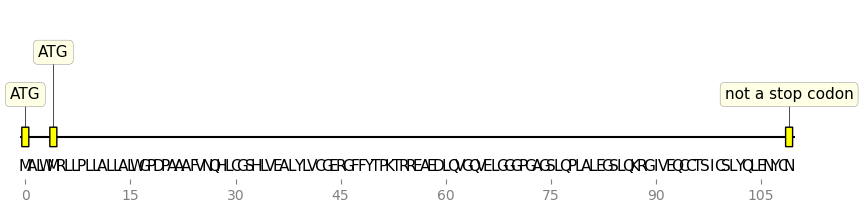

In [26]:
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

Shown in this annotation of the insulin protein in human is the start protein (Methionine) as well as another methionine later in the sequence. The annotation also shows that the the final codon is not a stop codon, this is because NCBI doesn't include stops at the end of their protein sequences. If we added a "*" to the end of the protein sequence, a stop codon would appear in the annotation.

# Task 2: Wrapping it all together with raw data

2.1 Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [27]:
def extract_seqs(fasta_file_path):
    # open the file
    seq_file = open(fasta_file_path)
    
    # all the characters that specify a Q score below 10
    lower_Q_scores = ['!','"','#','$','%','&',"'",'(',')','*']
    
    quality_seqs = {}
    
    # get all lines 
    lines = seq_file.readlines()
    
    # remove new line characters
    for i in range(len(lines)):
        lines[i] = lines[i].strip('\n')
    
    # for every 4 lines
    for i in range(0,len(lines)-3,4):
        extract = True
        for j in lines[i+3]:
            if j in lower_Q_scores: # if even one base has a Q score lower than 10, don't extract the sequence
                extract = False
        if extract == True: # otherwise, extract it with id as the key and sequence as the value
            quality_seqs[lines[i]] = lines[i+1] 
    
    return(quality_seqs)
                
extract_seqs("sample10000.fastq")        

{'@ERR016162.31734339 I354_1:1:107:10099:3616/2': 'AAGAATTTTTAAATTTCCATCTTGATTTCATTGTTGACCCCAAAATTATTCAGGAGTAGGTTATTTATTTTCCATGTATTTTCATGATTTTG',
 '@ERR016162.11626500 I354_1:1:39:2011:16189/2': 'GAATTATCGAATGGAATCGAAGAGAATCATCGAATGGACCCGAATGGAATCATCTAATGGAATGGAATGGAATAATCCATGGACTCGAATGC',
 '@ERR016162.22472995 I354_1:1:76:1648:20379/2': 'TTTATTTTTTAAATTATAATTTAAGTTCTAGGGCACATGTGCACAACGTGCAGGTTTGTTACATATGTATATATGTGCCATGTTGGTGTGCT',
 '@ERR016162.15992012 I354_1:1:53:14043:16936/2': 'CAAATGATACAGAAACCTTATGGAACCTGTAAGGTTAAATCATGCATTTCTGAAAGTAGTAATAATATTTACTTTACTTCCAGTGGGTTAAT',
 '@ERR016162.21114782 I354_1:1:71:6840:3152/2': 'TTCCAGTAAGGGTACCAAGACAATCTAATGGAGAAAGAATACTCTTTTCATCCCATGGTGTGGGACAAATAGAAATAGACATGCAAAGAAAA',
 '@ERR016162.19132565 I354_1:1:64:8630:15081/2': 'ATAAATATGGTACACCTAGTATGTCTAGTCAAAGACTCCTAACAAGGCAGAATGTGAACTTACAGTAAAGGCTTTCCAAGATGAGGAAACCA',
 '@ERR016162.31848060 I354_1:1:107:17161:14588/2': 'TTTTGGACACCGTGAACCAGCACCGGGCTGTGTCAGCCCAGCTCGAGGGGCCAGGGCAGAGGCAGGGTTCACGGAGA

In [28]:
class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTA file
    """
    def __init__(self, filepath):
        self.filepath = filepath
        self.dna_seqs = None
        self.dna_complementary_seqs = None
        self.rna_seqs = None
        self.aa_seqs = None
    
    # UPDATE THE FOLLOWING FUNCTIONS TO POPULATE THE ABOVE PROPERTIES
    def extract_seqs(self):
        # same as above function
        seq_file = open(self.filepath)
        lower_Q_scores = ['!','"','#','$','%','&',"'",'(',')','*']

        self.dna_seqs = {}

        lines = seq_file.readlines()

        for i in range(len(lines)):
            lines[i] = lines[i].strip('\n')

        for i in range(0,len(lines)-3,4):
            extract = True
            for j in lines[i+3]:
                if j in lower_Q_scores:
                    extract = False
            if extract == True:
                self.dna_seqs[lines[i]] = lines[i+1] 
        
        return(self.dna_seqs)
    
    def complementary_seqs(self,direction = 'same'):
        # if self.dna_seqs is empty, report a value error
        try:
            test = list(self.dna_seqs.values())
            test[0]
        except ValueError as ve:
            print("No significant DNA Sequences")
            return
        
        self.dna_complementary_seqs = self.dna_seqs
        
        # make our keys and values accessible in lists and therefore with integer indices
        keys = list(self.dna_complementary_seqs.keys())
        values = list(self.dna_complementary_seqs.values())
        
        # for each sequence (or value in the dict)
        for i in range(0,len(self.dna_seqs)):
            comp_bases = {'C':'G', 'G':'C', 'A': 'T', 'T':'A'}
            orig_seq = values[i]
            comp_seq = ''

            if direction == 'same': 
                for j in orig_seq:
                    try:
                        comp_seq += comp_bases[j]
                    except KeyError as ke:
                        print('Sequence is non-canonical')
                        return
            else:
                for j in range(len(orig_seq)-1,-1,-1):
                    g = orig_seq[j]
                    try:
                        comp_seq += comp_bases[g]
                    except KeyError as ke:
                        print('Sequence is non-canonical')
                        return
            
            # make the current key equal to our newly generated sequence
            self.dna_complementary_seqs[keys[i]] = comp_seq
            
        return(self.dna_complementary_seqs)

    def rna_seq(self):
        # if self.dna_complementary_seqs is empty, report a value error
        try:
            test = list(self.dna_complementary_seqs.values())
            test[0]
        except ValueError as ve:
            print("No significant Complementary DNA Sequences")
            return
            
        self.rna_seqs = self.dna_complementary_seqs
        
        # make our keys and values accessible in lists and therefore with integer indices
        keys = list(self.rna_seqs.keys())
        values = list(self.rna_seqs.values())
        
        # for each sequence (or value in the dict)
        for i in range(0,len(self.rna_seqs)):
            seq = values[i]
            bases = ['A','G','C','T','U']

            for j in seq:
                if j not in bases:
                    print('Sequence is non-canonical')
                    return

            if 'U' in seq:
                print('Input sequence is an RNA Sequence.')
                
            # make the current key equal to our newly generated sequence
            self.rna_seqs[keys[i]] = seq.replace('T','U')

        return(self.rna_seqs)
    
    def aa_seq(self):
        # if self.rna_seqs is empty, report a value error
        try:
            test = list(self.rna_seqs.values())
            test[0]
        except ValueError as ve:
            print("No significant RNA Sequences")
            return
            
        self.aa_seqs = self.rna_seqs
        
        # make our keys and values accessible in lists and therefore with integer indices
        keys = list(self.aa_seqs.keys())
        values = list(self.aa_seqs.values())
        
        codon_2_aa = {'AAA': 'K', 'AAC': 'N', 'AAG': 'K', 'AAU': 'N', 'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACU': 'T', 'AGA': 'R', 'AGC': 'S', 'AGG': 'R', 'AGU': 'S', 'AUA': 'I', 'AUC': 'I', 'AUG': 'M', 'AUU': 'I', 'CAA': 'Q', 'CAC': 'H', 'CAG': 'Q', 'CAU': 'H', 'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCU': 'P', 'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGU': 'R', 'CUA': 'L', 'CUC': 'L', 'CUG': 'L', 'CUU': 'L', 'GAA': 'E', 'GAC': 'D', 'GAG': 'E', 'GAU': 'D', 'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCU': 'A', 'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGU': 'G', 'GUA': 'V', 'GUC': 'V', 'GUG': 'V', 'GUU': 'V', 'UAA': '*', 'UAC': 'Y', 'UAG': '*', 'UAU': 'Y', 'UCA': 'S', 'UCC': 'S', 'UCG': 'S', 'UCU': 'S', 'UGA': '*', 'UGC': 'C', 'UGG': 'W', 'UGU': 'C', 'UUA': 'L', 'UUC': 'F', 'UUG': 'L', 'UUU': 'F'}
    
        # for each sequence (or value in the dict)
        for j in range(0,len(self.aa_seqs)):
            prot_seq = ''
            seq = values[j]
            for i in range(0,len(seq)-2,3):
                codon = seq[i] + seq[i+1] + seq[i+2]

                try:
                    prot_seq += codon_2_aa[codon]
                except KeyError as ke:
                    print('Sequence is non-canonical')
                    return    
                
            # make the current key equal to our newly generated sequence    
            self.aa_seqs[keys[j]] = prot_seq
        return(self.aa_seqs)

    def annot_aa_plot(self, seqid):
        # if self.aa_seqs is empty, report a value error
        try:
            test = list(self.aa_seqs.values())
            test[0]
        except ValueError as ve:
            print("No significant DNA Sequences")
            return
        
        # Create annotation for the input sequence
        protein = Seq(self.aa_seqs[seqid])
        protein_record = SeqRecord(protein, id="example", annotations={"molecule_type": "protein"})

        protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive
        graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
        ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
        graphic_record.plot_sequence(ax)
        return
    


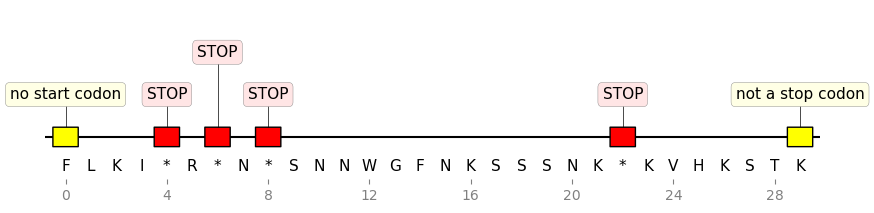

In [29]:
test = Genome("sample10000.fastq")
test.extract_seqs()
test.complementary_seqs()
test.rna_seq()
test.aa_seq()
test.annot_aa_plot('@ERR016162.31734339 I354_1:1:107:10099:3616/2')